<a href="https://colab.research.google.com/github/dtphuong2612/Machine_Learning_02/blob/main/homework01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ex1: Create data and implement PCA algorithm then visualize each step like the below figure.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [2]:
data = np.random.rand(100,3)

In [3]:
def show(data):
  plt.rcParams["figure.figsize"] = [10.0, 5.0]
  plt.rcParams["figure.autolayout"] = True
  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')
  z, x, y = data.T[0],data.T[1],data.T[2]
  ax.scatter(x, y, z, c=z, alpha=1)
  plt.show()

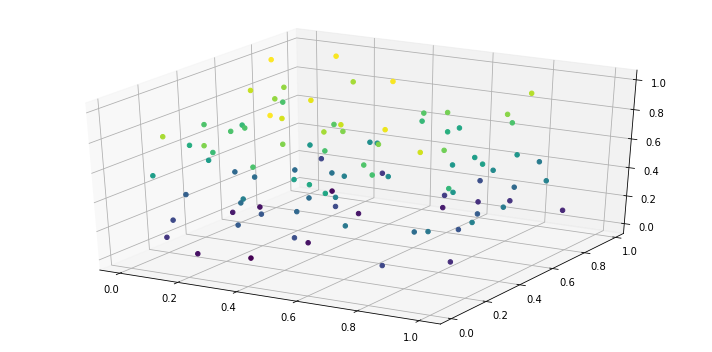

In [4]:
show(data)

In [5]:
mean = data.mean(axis=0)
mean

array([0.51683201, 0.45636899, 0.48000847])

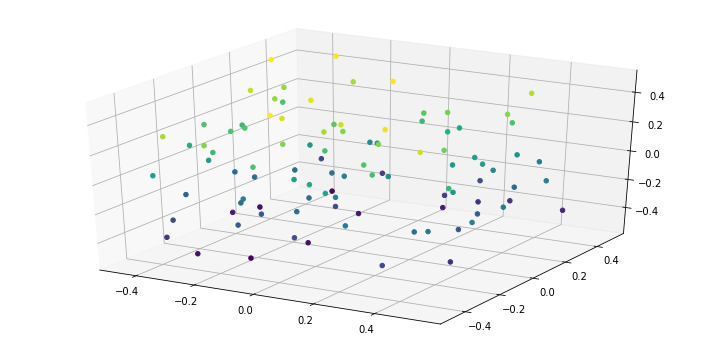

In [6]:
data = data - data.mean(axis=0)
show(data)

In [7]:
cov = np.cov(data.T) / data.shape[0] 
vl, vt = np.linalg.eigh(cov)

In [8]:
i = vl.argsort()[::-1] # Sort eigenvalue and set index
vl = vl[i] 
vt = vt[:,i]

In [10]:
z = data.dot(vt[:, :2])

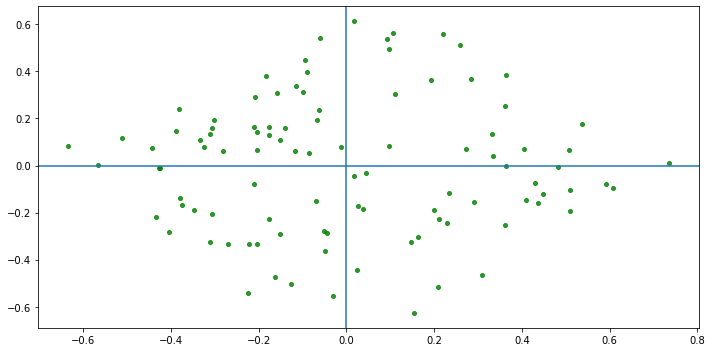

In [11]:
def projected(X):
   
    plt.plot(X[:,0], X[:,1], 'go', markersize = 4, alpha = .8)
    plt.axvline(x=0, ymin=0, ymax=1, lw=1.5, label='boudary')
    plt.axhline(y=0, xmin=0, xmax=1, lw=1.5)
    plt.show()

projected(z.real)

Ex2: Implement PCA algorithm to reduce dimension (2D) of iris dataset (https://archive.ics.uci.edu/ml/datasets/iris), then visualize  the result.

In [21]:
from sklearn.preprocessing import StandardScaler


In [26]:
dt_ = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df_ = pd.read_csv(dt_, names=['sepal length','sepal width','petal length','petal width','target'])
df_.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [23]:
features = ['sepal length', 'sepal width', 'petal length', 'petal width']
x = df_.loc[:, features].values
y = df_.loc[:,['target']].values
x = StandardScaler().fit_transform(x)

In [32]:
def cal_pca(data, dim):
  data = data-np.mean(data, axis=0)
  cov = np.cov(data.T) / data.shape[0] 
  vl, vt = np.linalg.eigh(cov)
  i = vl.argsort()[::-1] # Sort eigenvalue and set index
  vl = vl[i] 
  vt = vt[:,i]
  return data.dot(vt[:, :dim])

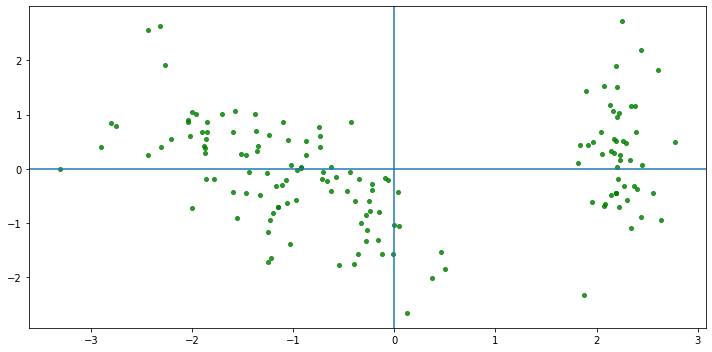

In [34]:
projected(cal_pca(x,2))

Ex3: Use PCA in sklearn to iris dataset and compare the result with the question 2.

In [35]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [36]:
dt = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df = pd.read_csv(dt, names=['sepal length','sepal width','petal length','petal width','target'])
df.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [50]:
features = ['sepal length', 'sepal width', 'petal length', 'petal width']
x = df.loc[:, features].values
y = df.loc[:,['target']].values
x = StandardScaler().fit_transform(x)

In [51]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [55]:
principalDf.head()

,principal component 1,principal component 2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767


In [52]:
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)

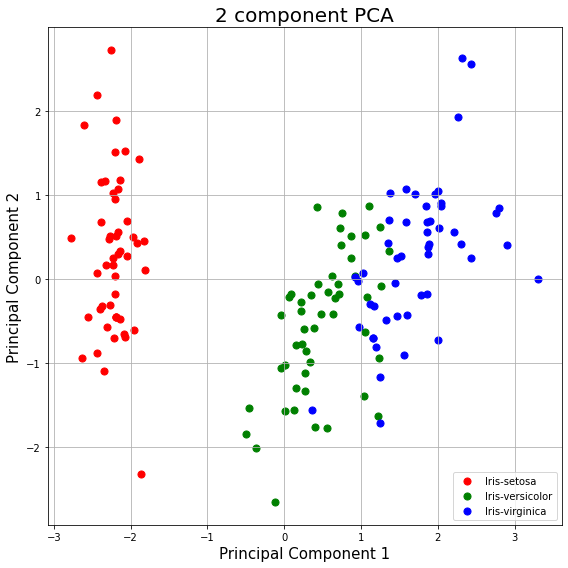

In [54]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()